<font size="5">CIA-3 (Exploratory Data Analysis)</font>

<font size="4">1. Business Understanding - Retail Industry</font>

Retail Industry is one of the most benefitted Industry when it comes to making use of the analysis of historical data and making informed decisions. Retailers operate in a highly dynamic and competitive customer-driven market that requires constant adaptation to meet the changing expectation of the consumers in order to keep them coming back. From Industrial age department stores to today’s multi-channel, ubiquitous environments, the retail industry continues to evolve dramatically. Nowadays, Shopping malls, Hypermarkets/Supermarkets, E-commerce platforms always keep track of their sales data of each and every item for predicting the future demand and to update the inventory management as well. Insights generated from the historical data helps in efficient inventory management, managing the budget, setting targets and in making informed business decisions. 

<font size="4">Problem Statement:</font>

In Retail Industry, there is always a challenge to make decisions on the basis of limited history. Sales prediction helps in efficient inventory management, managing the budget, setting targets and in making informed business decisions. Holiday season comes once a year and it does impact sales of many departments due to seasonality as well as various offers provided by the store at this time. The goal is to estimate the impact of these holidays on stores beforehand in order to have enough stock in the store for each department.

The main purpose of this analysis is to do Exploratory Data Analysis to find out the various factors which are impact the sales of the products across the stores.

<font size="4">2. Data Understanding</font>

The current dataset contains historical sales data for 45 Walmart stores located in different regions. Each store contains different departments as well. In addition, Walmart runs various promotional markdown events through the year on various occassions like Super Bowl, Labor Day, Thanksgiving, and Christmas. Information of those markdowns are also provided.

There are three files which are provided:

<font size="4">stores.csv</font> - This file contains anonymized information about the 45 stores, indicating the type and size of store.

<font size="4">sales.csv</font> - This file contains the weekly sales data by department and by store along with the holiday information. The various columns in the files are:
Store: the store number.
Dept: the department number in every store.
Date: the week for which the sales is captured.
Weekly_Sales: sales for the given department in the given store.
IsHoliday: whether the week is a special holiday week.

<font size="4">features.csv</font> - This file contains additional data related to the store, department, and regional activity for the given dates:
Store: the store number.
Date: the week.
Temperature: average temperature in the region.
MarkDown: anonymized data related to promotional markdowns.
CPI: Consumer Price Index.
Unemployment: the unemployment rate.
IsHoliday: whether the week is a special holiday.

In [1]:
#Importing the required libraries

import pandas as pd #For data analysis and manipulation
import numpy as np #for csv file input, data processing
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for visualization

In [2]:
#Reading the csv file

feature = pd.read_csv('C:\\Users\\Prachi Agrawal\\Desktop\\Christ University - MBA (2019-2021)\\5. Fourth Trimester\\3. Programming with Python\\CIA-3\\Features data set.csv')
sales = pd.read_csv('C:\\Users\\Prachi Agrawal\\Desktop\\Christ University - MBA (2019-2021)\\5. Fourth Trimester\\3. Programming with Python\\CIA-3\\sales data-set.csv')
store = pd.read_csv('C:\\Users\\Prachi Agrawal\\Desktop\\Christ University - MBA (2019-2021)\\5. Fourth Trimester\\3. Programming with Python\\CIA-3\\stores data-set.csv')

In [3]:
#checking the first 5 lines of the datasets

feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
#tail will give the last 5 lines of the dataset

feature.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [5]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
store.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [7]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [8]:
sales.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False
421569,45,98,26/10/2012,1076.80,False


In [9]:
#Converting the "Date" time in feature and sales file into Python Date time object
feature['Date'] = pd.to_datetime(feature['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

In [10]:
#Cross-checking the Date format

sales.head()
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
#Checking the size of the files
#Shape function will give the number of rows and column in the file.

print(feature.shape)
print(store.shape)
print(sales.shape)

(8190, 12)
(45, 3)
(421570, 5)


In [12]:
#Merging the three files into one common file as "data"

data=pd.merge(sales,feature, on=['Store','Date', 'IsHoliday'], how='left')
data=pd.merge(data,store, on=['Store'], how='left')

In [13]:
#Checking the head of the final dataset

data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [14]:
#To understand the summary of the data

data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [15]:
#Understanding the type of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 51.9+ MB


info is used to understand the datatype of every column in the dataset. It also tells the number of rows in which the data is present for a variable and whether we have null values or not.

In [16]:
data.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object

dtype is also used to understand the datatype of each variable.

In [17]:
#Checking the missing or null values in the data

data.isnull()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False
1,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False
2,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False
3,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False
4,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
421566,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
421567,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
421568,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


From the output, we can see that we have some null values in the Markdown columns.

In [18]:
#Calculating the total sum of all the null values in the data by column

data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

From the output, we can see that we have too much null values in the markdown column which is justified.
Because it only contains the value for those 3,4 period when there was markdown.

<font size="5">3. Data Preparation/Data cleaning</font>

Now, for better clarity and understanding, we will create two new columns for year and month separately to create better visualization.

In [19]:
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month

In [20]:
#Checking the head of the dataset

data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,5
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2010,12
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2010,2
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2010,2
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,2010,5


We can see that the year Column has been added.

Now, Checking and imputing the null values in the dataset

In [21]:
#Imputing the Null Values by 0 in the Markdown column

list_markdown = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
data[list_markdown] = data[list_markdown].fillna(0.)


In [22]:
#Cross-checking

data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
dtype: int64

<font size="5">4. Data Visualization</font>

In this section, we will try to explore the data and drive insights from it.

C:\Users\Prachi Agrawal\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


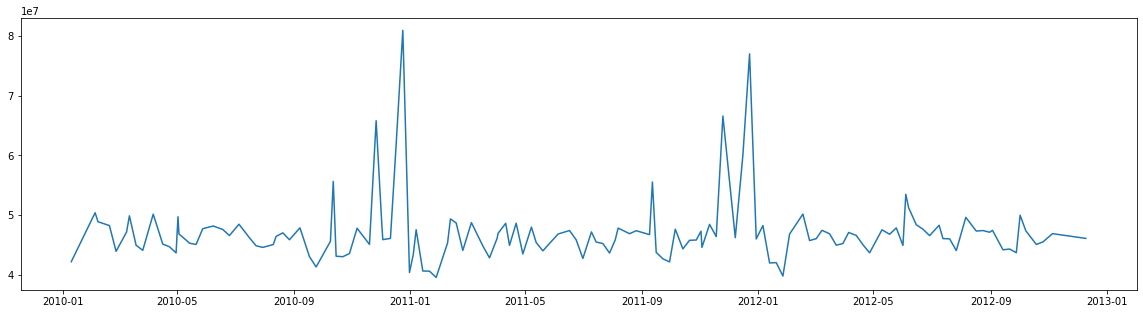

In [23]:
#Grouping the data by "Date" to calculate the Average Sales 
#Exploring the weekly sales by date

data_average_sales_week = data.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
data_average_sales = data_average_sales_week.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(data_average_sales_week.Date, data_average_sales_week.Weekly_Sales)
plt.show()

From the above chart, we can see that there is a spike in sales in November and December in both 2010 and 2011 which maybe the result of the mardown in the month of December during Christmas and during Thanksgiving in November.
Around the end of january it seems to be a pretty steep dip in the different stores sales both during 2011 and 2012.

In [24]:
# Top performing type of stores in term of sales
data_top_stores = data.groupby(by=['Type'], as_index=False)['Weekly_Sales'].sum()
data_top_stores.sort_values('Weekly_Sales', ascending=False)

,Type,Weekly_Sales
0,A,4.331015e+09
1,B,2.000701e+09
2,C,4.055035e+08


In [25]:
# Top performing stores in term of sales
data_top_stores = data.groupby(by=['Store'], as_index=False)['Weekly_Sales'].sum()
data_top_stores.sort_values('Weekly_Sales', ascending=False)[:3]

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08


Now, we will try to understand the impact of various features on the sales of the stores whether any changes in them results in increase or decrease in sales or not.

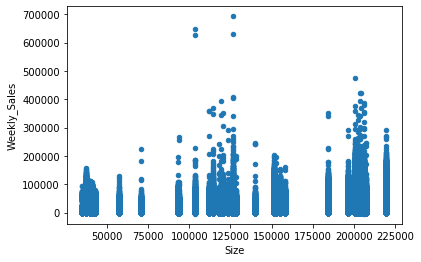

In [26]:
#Scatter plot using Pandas Data Visualization to understand the relation between size of the store and the weekly sales

data.plot.scatter(x='Size',y='Weekly_Sales')

From the above Scatter plot, we can see that the sales seems to be uniform for all the store sizes. However, there is still an increase in sales with the increase in size of the store.

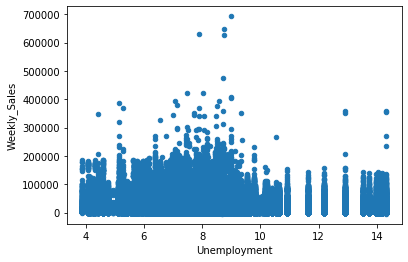

In [27]:
#Scatter plot to understand the relation between Unemployment and the weekly sales

data.plot.scatter(x='Unemployment',y='Weekly_Sales')

From the above chart, we can see that as the unemployment rate is increasing, the weekly sales is coming down. However, when the employment rate is less, sales is prominent.

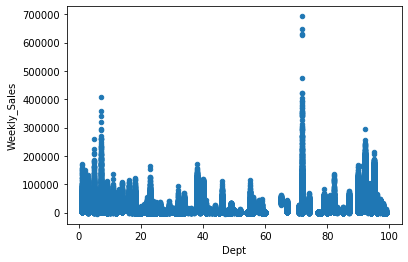

In [28]:
#Scatter plot to understand the relation between Department and the weekly sales

data.plot.scatter(x='Dept',y='Weekly_Sales')

We can see that some of the departments are having higher sales. These departments can be probably like Fruits and Vegetables, Dairy products which are required on day to day basis.

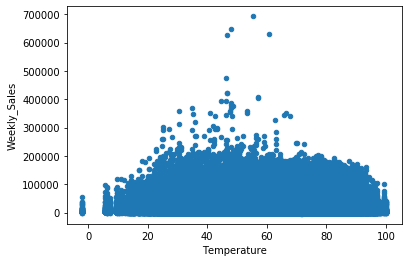

In [29]:
#Scatter plot to understand the relation between Temperature and the weekly sales

data.plot.scatter(x='Temperature',y='Weekly_Sales')

Temperature doesnt seem to have any impact on the sales of the stores as it is uniform in all the weathers apart from some of the outliers in between 40 to 60 where we have a spike in sales in a couple of incidents which can be outliers as well.

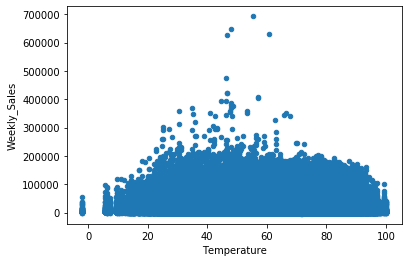

In [30]:
#Scatter plot to understand the relation between Temperature and the weekly sales

data.plot.scatter(x='Temperature',y='Weekly_Sales')

In [31]:
# Correlation between Weekly Sales and all other features

data_corr = data[data.columns[:]].corr()['Weekly_Sales'][:]
data_corr = data_corr.drop("Weekly_Sales")
data_corr

Store          -0.085195
Dept            0.148032
IsHoliday       0.012774
Temperature    -0.002312
Fuel_Price     -0.000120
MarkDown1       0.047172
MarkDown2       0.020716
MarkDown3       0.038562
MarkDown4       0.037467
MarkDown5       0.050465
CPI            -0.020921
Unemployment   -0.025864
Size            0.243828
Year           -0.010111
Month           0.024944
Name: Weekly_Sales, dtype: float64

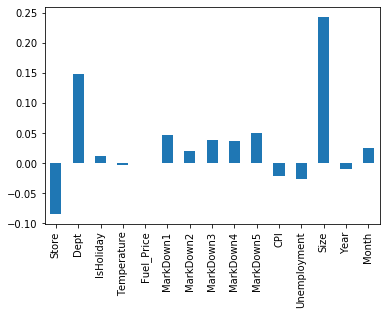

In [32]:
#Plotting the co-relation

data_corr.plot.bar()

The correlation table and graph indicate a few things:

MarkDowns: Not that significant in terms of weekly sales
Size: Highest correlation of all, telling us that having a larger store = more sales. Only thing to notice is that this could imply that having larger stores will automatically increase revenues.
Department: Positive correlation with sales as well.

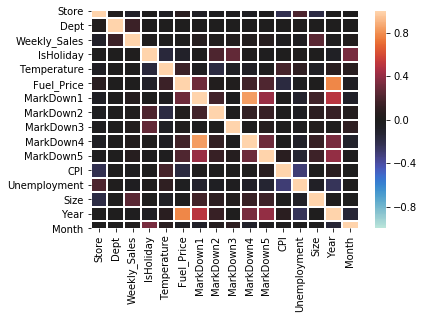

In [33]:
#Making a heatmap to understand the correlation between the variables
#Using Seaborn library

sns.heatmap(data.corr(),linewidths=1,vmin=-1,vmax=1,center=0)

From the above heat map, we can see that Weekly Sales has good cor-relation with the size of the store and the department as well. Along with that, markdowns are having cor-relation with Is Holday which makes sense as well since the Markdowns are generally provided on the holidays like Christmas, Thanksgiving. So, along with the Markdowns, Department, Store Size can be considered as some of the variables in the further analysis.

<font size="5">5. Useful Insights</font>

From the above analysis, we have come down to the following points:

1. Sales of the stores is higher in November and December which may be the result of the Markdown going on during the Thanksgiving and Christmas Period.

2. The Size of the store does have a high correlation with the Sales. As the size is increasing, the sales of the store is also increasing.

3. Moreover, the various department under the stores also have correlation with the sales as it indicates that some department might have more sales than others. For Eg: Grocery and Dairy department might have more sales comparative to household items department however, household department sales may increase during any festivals.

So, we can consider the variables like: Size, department, all the markdown values to be taken ahead for the further analysis to consider their impact on the sales and for the prediction as well.